 # <font color ="red">Part I (Exploring the Ford GoBike System Data)</font>
## <font color ="green">by Dooter Dondo</font>

## Dataset

This data set includes information about 183 412individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This data set includes information such as the `start` and `end` station names, `duration of the trips` and alot more. This dataset can be found on [ford.com](ford.com)


## Summary of Findings

In the exploration, I found that there is no significant relationship between the age of the 
riders and how long they will take to complete their trip. It is however worthy of note that
the oldest member was identified by the other gender.


## Key Insights for Presentation

For the presentation, I focused majorly on showing that no relationship exists between the age 
of the riders and the mean duration of their trips.


 ### <font color ="blue"> Data wrangling Phase</font>

In [38]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>
# importing all required packages and setting plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [39]:
import pandas as pd
# Read in the dataset into a pandas dataframe
goBike = pd.read_csv('201902-fordgobike-tripdata.csv')

 #### <font color ="brown"> Programmatic and Visual Assesment of the Dataset</font>

In [40]:
print(goBike.shape)
print('*' *100)
print(goBike.info())
print('*' *100)
print(goBike.dtypes)
goBike.head(10)

(183412, 16)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


 #### <font color ="brown"> checking the dataset for missing values</font>

In [41]:
# checking for missing values 
goBike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

 ### <font color ="purple"> Cleaning the Dataset</font>

 #### <font color ="tan"> Quality Issues Identified</font>

* Missing data accross multiple columns
* Incorrect data types in `start` and `end` time columns, and in `bike_id` column

In [42]:
# make a copy of the original dataset before cleaning it
goBike_clean = goBike.copy()

 ### <font color ="purple"> Missing data accross multiple columns </font>

#### Define

##### Replacing all missing values by the modal entry values in each column

#### Code

In [43]:
goBike_clean = goBike_clean.fillna(goBike_clean.mode().iloc[0])

#### Test

In [44]:
goBike_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

 ### <font color ="purple"> Incorrect Datatypes </font>

#### Define

Change the datatype in the `start` and `end` time columns to timestamp

#### Code

In [82]:
goBike_clean.start_time = pd.to_datetime(goBike_clean.start_time)
goBike_clean.end_time= pd.to_datetime(goBike_clean.end_time)

#### Test

In [46]:
type(goBike_clean.end_time[0])

pandas._libs.tslibs.timestamps.Timestamp

#### Change the datatype in the `bike_id` column to string

#### Define

Convert the integer datatype to object or string in the `bike_id` column

#### Code

In [47]:
goBike_clean.bike_id =goBike_clean.bike_id.astype(str)

##### Test

In [48]:
type(goBike_clean.bike_id[0])

str

## What is the structure of your dataset?

#### This dataset is made up  183,412 rows and 16 columns. There are 2 datetime, 7 float, 1 int and 6 string or object data types.

## What is/are the main feature(s) of interest in your dataset?

#### I am most interested in finding out the the relationship between the gender, the mean time spent for a trip and year of birth of the users who completed their trips

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?

#### I believe the member_gender, the user_type and the duration_sec will support my investigations here and also the birth_year of the members

 ## <font color ="gold"> Exploratory Data Analysis </font>

## Univariate Exploration

In [49]:
goBike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1988.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#### Exploring the highest member gender 

In [50]:
Hgender = goBike_clean.member_gender.value_counts()

In [51]:
Hgender

Male      138916
Female     40844
Other       3652
Name: member_gender, dtype: int64

### Question: What is the highest member gender?

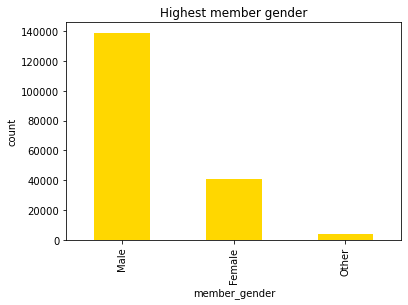

In [52]:
Hgender.plot(kind = 'bar', color ='gold', xlabel = 'member_gender', ylabel='count', title= 'Highest member gender');

### Answer: The plot above shows the Highest member gender

#### Exploring the time the most rides and least rides were completed in

In [53]:
Lduration = goBike_clean.duration_sec.value_counts(ascending=False)

In [54]:
Lduration

272      311
324      292
323      291
306      291
305      290
        ... 
18550      1
11018      1
2232       1
4244       1
2822       1
Name: duration_sec, Length: 4752, dtype: int64

In [55]:
LdurationTop = Lduration.head(5)

In [56]:
LdurationTop

272    311
324    292
323    291
306    291
305    290
Name: duration_sec, dtype: int64

###  Question: What is the modal duration of time  for completion  trips?

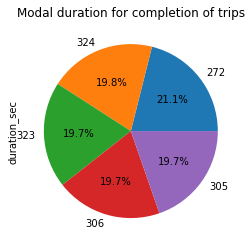

In [57]:
LdurationTop.plot(kind = 'pie',   title= 'Modal duration for completion of trips', autopct='%1.1f%%',  startangle=0, legend=False);

### Anser: 21.1% of the riders completed their trips in 272 seconds which is the modal time of completion of trips

In [58]:
sduration = Lduration = goBike_clean.duration_sec.value_counts().nsmallest()

In [59]:
sduration.head(5)

3171     1
6778     1
3169     1
16867    1
5410     1
Name: duration_sec, dtype: int64

In [60]:
goBike_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,member_birth_year
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000
mean,726.078435,138.503866,37.771223,-122.352664,136.174743,37.771427,-122.352250,1984.950347
std,1794.389780,111.750001,0.099581,0.117097,111.478306,0.099490,0.116673,9.908290
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,1981.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,1988.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,2001.000000


### Question: What time duration were the least trips completed?

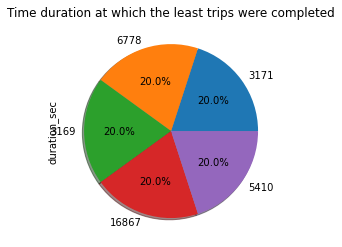

In [61]:
sduration.plot(kind = 'pie',   title= 'Time duration at which the least trips were completed', autopct='%1.1f%%', shadow=True, startangle=0, legend=False);

### Answer: The least trips were concluded in 6778 sec, 3171 sec, 5410 sec, 16867 sec and 169 sec.

#### Exploring the most user type

In [62]:
mUsertype = goBike_clean.user_type.value_counts()

In [63]:
mUsertype

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

### Question: What is the modal user type?

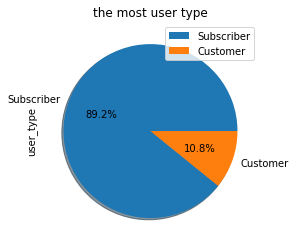

In [64]:
mUsertype.plot (kind = 'pie',   title= 'the most user type', autopct='%1.1f%%', shadow=True, startangle=0, legend=True);
    

### Answer: The modal User type is the `suscriber` with a total percentage of '89.2%'

#### Exploring the `bike_share_for_all_trip`

### Question: What is the total percentage of bike_share_for_trips?

In [65]:
bikeShare = goBike_clean.bike_share_for_all_trip.value_counts()

In [66]:
bikeShare

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

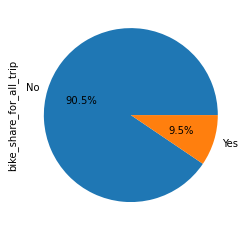

In [67]:
bikeShare.plot(kind='pie',autopct='%1.1f%%');

###  Answer: `90%` of the riders did not share a bike to complete their trip, while `9.5%` did share bikes

#### Exploring the modal_member_birth_year

### In what year were most of the riders born?

In [68]:
mByear = goBike_clean.member_birth_year.value_counts().nlargest()

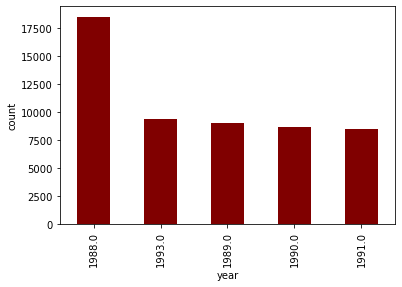

In [69]:
mByear.plot(kind = 'bar', xlabel = 'year', ylabel = 'count', color = 'maroon');

### Majority of the riders were born in `1988`

* There are a total of `138916` males who took part in the bike rides and a total of `40844` females while `3652` prefered to be identified as others
* `21.1%` of the population took 272 seconds to complete the ride which is the modal time taken by the riders to complete their rides
* Only one rider took as much as `31691 seconds` to complete their ride
* `726.078435 seconds` is the average time taken by riders to complete their rides
* `89.2%` of the riders are subscribers while only `10.8%` are customers.
* Modal_birth year of riders is 1988    
* 95% of riders did not share their bikes

## Question: What is the percentage of ride frequency by user_type?

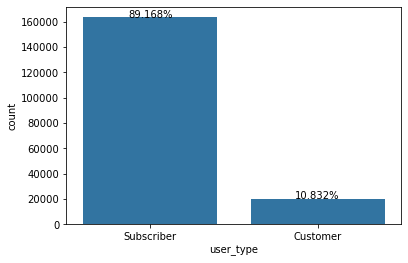

In [70]:
import matplotlib.pyplot as plt
import seaborn as sb
# ride frequency per user type
ax = sb.countplot(data = goBike_clean, x = 'user_type',  color=sb.color_palette()[0], order=goBike_clean.user_type.value_counts().index)

total = len(goBike_clean)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show();

## Answer: The subscriber user_type has the highest frquency which is a total of `89.168%`

## Keeping tabs on start days and end days to draw insights

In [71]:
import datetime as dt
goBike_clean['start_day'] = goBike_clean['start_time'].dt.day_name()
goBike_clean['start_month'] = goBike_clean['start_time'].dt.month_name()
goBike_clean['start_hr'] = goBike_clean['start_time'].dt.hour
goBike_clean['start_hr'] = goBike_clean.start_hr.astype(str)
goBike_clean['end_day'] = goBike_clean['end_time'].dt.day_name()
goBike_clean['end_month'] = goBike_clean['end_time'].dt.month_name()
goBike_clean['end_hr'] = goBike_clean['end_time'].dt.hour
goBike_clean['end_hr'] = goBike_clean.end_hr.astype(str)

##  converting days and hours into ordinal data types

In [72]:
# convert day, and hour into ordered categorical types
ordinal_var_dict = {'start_day': ['Sunday','Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday'],
                    'end_day': ['Sunday','Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    goBike_clean[var] = goBike_clean[var].astype(ordered_var)

## Question 1: what day of the week has the highest rides?
## Question 2: what effect does the weekend has on ride completion?

<AxesSubplot:xlabel='end_day', ylabel='count'>

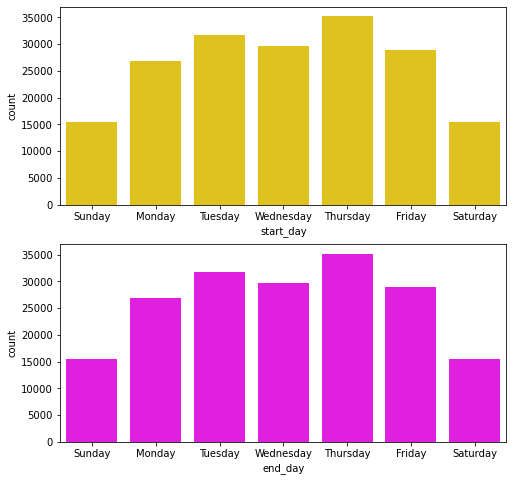

In [73]:
# ride frequency per days

fig, ax = plt.subplots(2, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = goBike_clean, x = 'start_day', color = 'gold',  ax = ax[0])
sb.countplot(data = goBike_clean, x = 'end_day', color = 'magenta',  ax = ax[1])

## Answer 1: I find out that for some reason, the most rides were completed on Thursdays
## Answer 2: The least rides were started and completed during the weekend days of Saturday and Sundays, which implies that most of the members only take their trips on weekdays

## Question 1: In what hour were the most trips started?
## Question 2: In what hour were the most trips completed?
## Question 3: In what hour were the least trips started?
## Question 4: In what hour were the least trips ended?

<AxesSubplot:xlabel='end_hr', ylabel='count'>

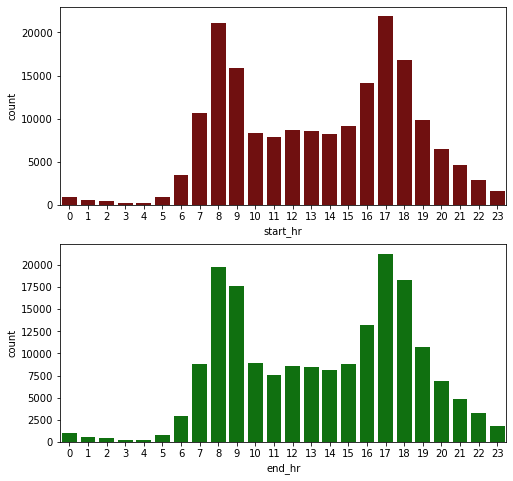

In [74]:
# ride frequency per hours

fig, ax = plt.subplots(2,figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = goBike_clean, x = 'start_hr', color = 'maroon',  ax = ax[0])
sb.countplot(data = goBike_clean, x = 'end_hr', color = 'green', ax = ax[1])

## Answer 1: Most trips started at  `17:00` Hrs which means most bikers prefer evening rides
## Answer 2: Most trips were also completed within the same hour they were started, which will mean the majority of the trips lasted a duration less than an hour.
## Answer 3: The least trips started around `03:00` and `04:000` Hrs. This is very logical as by this time, most people are still asleep.
## Answer 4: The least trips also ended around `03:00` and `04:00` Hrs.

## Bivariate Exploration

In [75]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [76]:
variable = ['user_type', 'member_gender', 'bike_share_for_all_trip', 'start_day','end_day', 'start_hr', 'end_hr']

### Question 1: On an Average, what user type spends the most time in completing their trips?
### Question 2: What is the bikeshare in relationship to the user types?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, 

<Figure size 1440x1440 with 0 Axes>

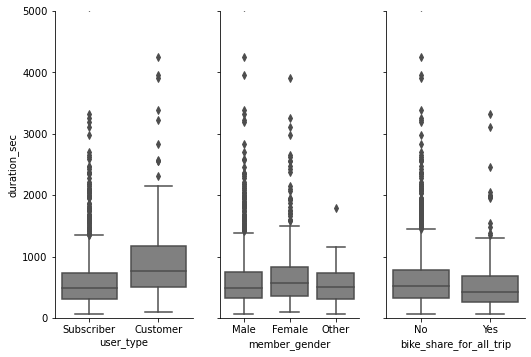

In [77]:


samples = np.random.choice(goBike_clean.shape[0], 2000, replace = False)
samp_2 = goBike_clean.loc[samples,:]


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[5]
    sb.boxplot(x, y, color = 'grey')

plt.figure(figsize = [20, 20])
g = sb.PairGrid(data = samp_2, y_vars = 'duration_sec', x_vars = ['user_type', 'member_gender', 
                                                                         'bike_share_for_all_trip'],
                size = 5, aspect = 0.5)
g.map(boxgrid)
plt.ylim([0,5000])
plt.show();

### Answers:
* From my analysis, customers spend more time on average than subscribers. Also the female gender spends higher time on average than the male gender in completing their rides.
* The `Bike share` for all trips is across all types of members.

## Question: what is the relationship between user type, bike_share and number of users?

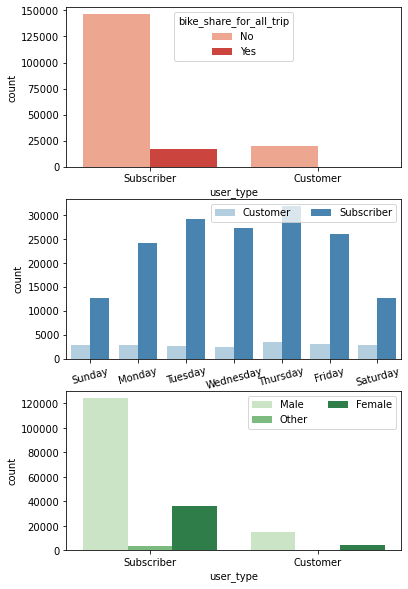

In [78]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [6, 10])

# subplot 1: user_type vs bike_share_for_all_trip
plt.subplot(3, 1, 1)
sb.countplot(data = goBike_clean, x = 'user_type', hue = 'bike_share_for_all_trip', order=goBike_clean.user_type.value_counts().index,
             palette = 'Reds')

# subplot 2: end_day vs. user_type
ax = plt.subplot(3, 1, 2)
sb.countplot(data = goBike_clean, x = 'start_day', hue = 'user_type', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation=15)

# subplot 3: user_type vs. member_gender, 
ax = plt.subplot(3, 1, 3)
sb.countplot(data = goBike_clean, x = 'user_type', hue = 'member_gender',order=goBike_clean.user_type.value_counts().index,
             palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.show()

## Answers: From the plot above, it is clear that  a greater number of members did not share their bikes to complete their trips, and also the customer type does not affect the number of trips in any week at all

## Multivariate Exploration

## Question: What factors affect the duration of trips of the member?

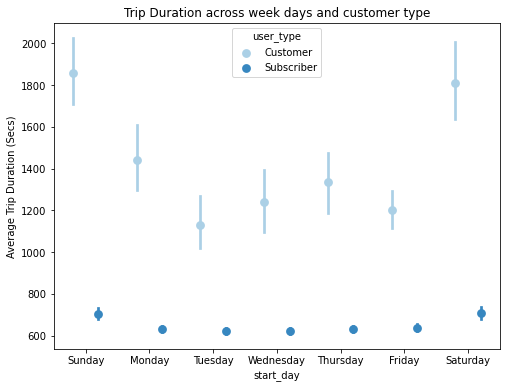

In [80]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = goBike_clean, x ='start_day', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across week days and customer type')
plt.ylabel('Average Trip Duration (Secs)')
# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

## Answer: Customers travel very longer distance regardless the day of the week(longest on weekends) whereas subscribers generally travel short distance with litle increase on weekends but not up to that of the customers.

## Does the member gender affect duration of trip?

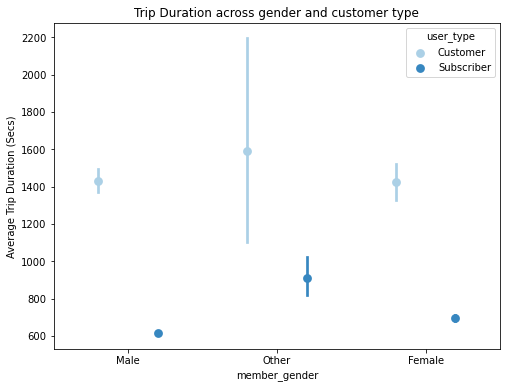

In [81]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = goBike_clean, x ='member_gender', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and customer type')
plt.ylabel('Average Trip Duration (Secs)')
0
ax.set_yticklabels([],minor = True)
plt.show();


## For all members, the other gender spends the most time to complete trips, so yes, I can say that yes, the member type affects the duration of trips